In [37]:
import pandas as pd

In [38]:
df1=pd.read_csv("fake_reg.csv")

In [39]:
df1.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
df1.shape

(1000, 3)

In [42]:
df1.isnull().sum().any()

False

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt


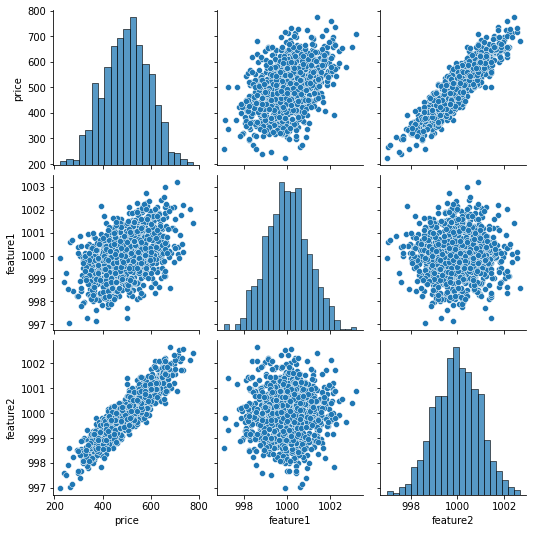

In [44]:
sns.pairplot(df1)

In [45]:
df1.corr()

,price,feature1,feature2
price,1.000000,0.444190,0.907576
feature1,0.444190,1.000000,0.030607
feature2,0.907576,0.030607,1.000000


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X=df1[["feature1", "feature2"]].values

In [48]:
y=df1.price.values

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [50]:
X_train.shape

(700, 2)

In [51]:
X_train

array([[1001.63407565,  998.80950388],
       [ 999.76150137,  998.41802414],
       [ 998.2638401 , 1000.92030063],
       ...,
       [1000.47386523, 1001.44542815],
       [ 998.8625673 ,  999.15662112],
       [1000.55690247,  999.35441706]])

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler=MinMaxScaler()

In [54]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [55]:
import tensorflow as tf

In [56]:
tf.__version__

'2.4.0'

In [57]:
from tensorflow.keras.models import Sequential

In [58]:
from tensorflow.keras.layers import Dense, Activation

In [59]:
model=Sequential()
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1))

In [60]:
model.compile(optimizer="rmsprop", loss="mse")

In [61]:
model.fit(X_train, y_train, batch_size=32, epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 255281.4076
Epoch 2/250
22/22 [==============================] - 0s 969us/step - loss: 259383.7683
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 257016.6658
Epoch 4/250
22/22 [==============================] - 0s 939us/step - loss: 254795.0679
Epoch 5/250
22/22 [==============================] - 0s 993us/step - loss: 251648.6875
Epoch 6/250
22/22 [==============================] - 0s 974us/step - loss: 250856.2649
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 258008.2208
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 256630.8974
Epoch 9/250
22/22 [==============================] - 0s 974us/step - loss: 253437.5177
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 260062.8804
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 254304.5910
Epoch 12/250
22/22 [==============================] -

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [63]:
loss_df=pd.DataFrame(model.history.history)

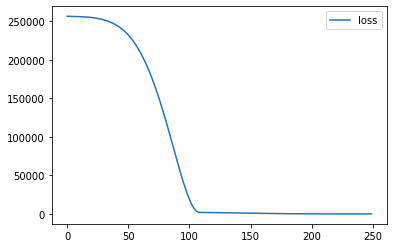

In [64]:
loss_df.plot()

(20.0, 100.0)

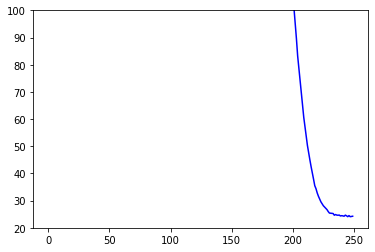

In [72]:
fig, ax= plt.subplots()
ax.plot(loss_df)
 
ax.set_ylim([20,100])

In [73]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [74]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [75]:
y_pred=model.predict(X_test)

In [78]:
eval_metrics(y_test, y_pred)

r2_score: 0.9971060086119191 
 mae: 4.068229304956471 
 mse: 25.444063923438627 
 rmse: 5.044210931695722


In [76]:
my_dict={"Actual":y_test, "Pred":y_pred.reshape(300,)}
compare=pd.DataFrame(my_dict)

In [77]:
compare.sample(5)

,Actual,Pred
263,439.090260,433.517303
244,528.128613,532.276245
203,396.049985,405.249481
113,554.762667,551.146301
100,610.091708,605.706055
